In [3]:
import pandas as pd 
import numpy as np 

In [4]:
data = pd.read_csv("data/diabetes.csv")
data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [10]:
random_sample = np.random.randint(0, 767, 10)

In [11]:
random_sample

array([342, 264, 504, 619, 662,  32, 680, 313, 252, 109])

In [17]:
small_data = data.iloc[random_sample]

In [18]:
small_data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
342,1,0,68,35,0,32.0,0.389,22,0
264,4,123,62,0,0,32.0,0.226,35,1
504,3,96,78,39,0,37.3,0.238,40,0
619,0,119,0,0,0,32.4,0.141,24,1
662,8,167,106,46,231,37.6,0.165,43,1
32,3,88,58,11,54,24.8,0.267,22,0
680,2,56,56,28,45,24.2,0.332,22,0
313,3,113,50,10,85,29.5,0.626,25,0
252,2,90,80,14,55,24.4,0.249,24,0
109,0,95,85,25,36,37.4,0.247,24,1


In [19]:
small_features_set = ['Pregnancies', 'Glucose', 'BloodPressure', 'BMI', 'Age', 'Outcome']
small_data = small_data[small_features_set]
small_data

,Pregnancies,Glucose,BloodPressure,BMI,Age,Outcome
342,1,0,68,32.0,22,0
264,4,123,62,32.0,35,1
504,3,96,78,37.3,40,0
619,0,119,0,32.4,24,1
662,8,167,106,37.6,43,1
32,3,88,58,24.8,22,0
680,2,56,56,24.2,22,0
313,3,113,50,29.5,25,0
252,2,90,80,24.4,24,0
109,0,95,85,37.4,24,1


In [21]:
features_columns = ['CGPA', 'Interactive', 'PracticalKnowledge', 'CommSkills', 'Label']
data_df = [['>=9', 'Yes', 'Very good', 'Good', 'Yes'], ['>=8', 'No', 'Good', 'Moderate', 'Yes'],
          ['>=9', 'No', 'Average', 'Poor', 'No'],['<8', 'No', 'Average', 'Poor', 'No'], ['>=8', 'Yes', 'Good', 'Moderate', 'Yes'], 
          ['>=9', 'Yes', 'Good', 'Moderate', 'Yes'], ['<8', 'Yes', 'Good', 'Poor', 'No'], ['>=9', 'No', 'Very good', 'Good', 'Yes'], 
           ['>=8', 'Yes', 'Very good', 'Good', 'Yes'], ['>=8', 'Yes', 'Average', 'Good', 'Yes']]

In [23]:
job_data = pd.DataFrame(data_df, columns=features_columns)

In [24]:
job_data

,CGPA,Interactive,PracticalKnowledge,CommSkills,Label
0,>=9,Yes,Very good,Good,Yes
1,>=8,No,Good,Moderate,Yes
2,>=9,No,Average,Poor,No
3,<8,No,Average,Poor,No
4,>=8,Yes,Good,Moderate,Yes
5,>=9,Yes,Good,Moderate,Yes
6,<8,Yes,Good,Poor,No
7,>=9,No,Very good,Good,Yes
8,>=8,Yes,Very good,Good,Yes
9,>=8,Yes,Average,Good,Yes


In [25]:
job_data.to_csv('data/jobs.csv')

In [30]:
def p_i(data, feature_name): 
    points = data[feature_name].values.tolist()
    p = {}
    
    for i in set(points) : 
        p[i] = points.count(i)/len(points)
    return p 

In [31]:
p_i(job_data, 'Label')

{'No': 0.3, 'Yes': 0.7}

In [32]:
def gini_index(p_i) : 
    s = 0 
    for k in p_i.keys(): 
        s += p_i[k]**2 
    return 1 - s 

In [33]:
gini_index(p_i(job_data, 'Label'))

0.42000000000000004

In [36]:
cgpa_set = set(job_data['CGPA'].values)

In [37]:
import itertools 

In [40]:
for elt in itertools.product(cgpa_set, cgpa_set): 
    print(elt)

('>=8', '>=8')
('>=8', '>=9')
('>=8', '<8')
('>=9', '>=8')
('>=9', '>=9')
('>=9', '<8')
('<8', '>=8')
('<8', '>=9')
('<8', '<8')


In [48]:
def powerset(iterable):
    "powerset([1,2,3]) --> () (1,) (2,) (3,) (1,2) (1,3) (2,3) (1,2,3)"
    s = list(iterable)
    return itertools.chain.from_iterable(itertools.combinations(s, r) for r in range(len(s)+1))


In [49]:
cgpa_powerset = powerset(cgpa_set)
list(cgpa_powerset)

[(),
 ('>=8',),
 ('>=9',),
 ('<8',),
 ('>=8', '>=9'),
 ('>=8', '<8'),
 ('>=9', '<8'),
 ('>=8', '>=9', '<8')]

In [50]:
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation

In [51]:
X = job_data[features_columns[:-1]] # Features
y = job_data.Label # Target variable

In [52]:
X

,CGPA,Interactive,PracticalKnowledge,CommSkills
0,>=9,Yes,Very good,Good
1,>=8,No,Good,Moderate
2,>=9,No,Average,Poor
3,<8,No,Average,Poor
4,>=8,Yes,Good,Moderate
5,>=9,Yes,Good,Moderate
6,<8,Yes,Good,Poor
7,>=9,No,Very good,Good
8,>=8,Yes,Very good,Good
9,>=8,Yes,Average,Good


In [53]:
y

0    Yes
1    Yes
2     No
3     No
4    Yes
5    Yes
6     No
7    Yes
8    Yes
9    Yes
Name: Label, dtype: object

In [55]:
from sklearn.preprocessing import LabelEncoder
 
# Creating a instance of label Encoder.
le = LabelEncoder()
 
# Using .fit_transform function to fit label
# encoder and return encoded label
label = le.fit_transform(job_data['Label'])
 
# printing label
label

array([1, 1, 0, 0, 1, 1, 0, 1, 1, 1])

In [57]:
job_df = job_data.copy()

for f in features_columns : 
    cat_f = le.fit_transform(job_data[f])
    job_df.drop(f, axis=1, inplace=True)
    job_df[f] = cat_f
    

In [58]:
job_df

,CGPA,Interactive,PracticalKnowledge,CommSkills,Label
0,2,1,2,0,1
1,1,0,1,1,1
2,2,0,0,2,0
3,0,0,0,2,0
4,1,1,1,1,1
5,2,1,1,1,1
6,0,1,1,2,0
7,2,0,2,0,1
8,1,1,2,0,1
9,1,1,0,0,1


In [75]:
X = job_df[features_columns[:-2]] # Features
y = job_df.Label # Target variable

clf = DecisionTreeClassifier(criterion="gini", max_depth=3)

# Train Decision Tree Classifer
clf = clf.fit(X,y)


In [76]:
from six import StringIO 
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus

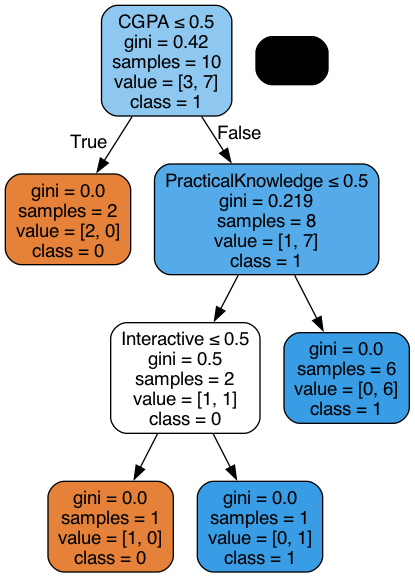

In [77]:
dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True, feature_names = features_columns[:-2],class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('jobs.png')
Image(graph.create_png())

In [78]:
job_df.values

array([[2, 1, 2, 0, 1],
       [1, 0, 1, 1, 1],
       [2, 0, 0, 2, 0],
       [0, 0, 0, 2, 0],
       [1, 1, 1, 1, 1],
       [2, 1, 1, 1, 1],
       [0, 1, 1, 2, 0],
       [2, 0, 2, 0, 1],
       [1, 1, 2, 0, 1],
       [1, 1, 0, 0, 1]])

In [79]:
from sklearn.decomposition import PCA

In [80]:
pca = PCA(n_components=2)
X_r = pca.fit(job_df.values).transform(job_df.values)

In [81]:
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'PCA of IRIS dataset')

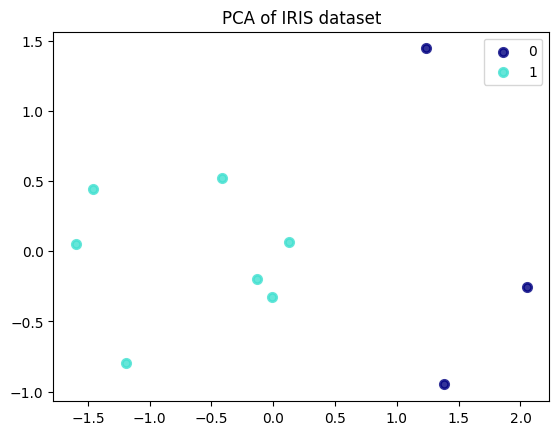

In [86]:
colors = ["navy", "turquoise"]
lw = 2

for color, i, target_name in zip(colors, [0, 1], [0,1]):
    plt.scatter(
        X_r[y == i, 0], X_r[y == i, 1], color=color, alpha=0.8, lw=lw, label=target_name
    )
plt.legend(loc="best", shadow=False, scatterpoints=1)
plt.title("PCA of IRIS dataset")

In [85]:
label

array([1, 1, 0, 0, 1, 1, 0, 1, 1, 1])

In [87]:
job_data

,CGPA,Interactive,PracticalKnowledge,CommSkills,Label
0,>=9,Yes,Very good,Good,Yes
1,>=8,No,Good,Moderate,Yes
2,>=9,No,Average,Poor,No
3,<8,No,Average,Poor,No
4,>=8,Yes,Good,Moderate,Yes
5,>=9,Yes,Good,Moderate,Yes
6,<8,Yes,Good,Poor,No
7,>=9,No,Very good,Good,Yes
8,>=8,Yes,Very good,Good,Yes
9,>=8,Yes,Average,Good,Yes


In [88]:
job_data.to_latex()

'\\begin{tabular}{llllll}\n\\toprule\n & CGPA & Interactive & PracticalKnowledge & CommSkills & Label \\\\\n\\midrule\n0 & >=9 & Yes & Very good & Good & Yes \\\\\n1 & >=8 & No & Good & Moderate & Yes \\\\\n2 & >=9 & No & Average & Poor & No \\\\\n3 & <8 & No & Average & Poor & No \\\\\n4 & >=8 & Yes & Good & Moderate & Yes \\\\\n5 & >=9 & Yes & Good & Moderate & Yes \\\\\n6 & <8 & Yes & Good & Poor & No \\\\\n7 & >=9 & No & Very good & Good & Yes \\\\\n8 & >=8 & Yes & Very good & Good & Yes \\\\\n9 & >=8 & Yes & Average & Good & Yes \\\\\n\\bottomrule\n\\end{tabular}\n'